# Modèle linéaire en 1D

16 septembre 2019

Slides : 02_LeastSquare1Dfranne.pdf

### References

- http://www.statsmodels.org/devel/examples/notebooks/generated/ols.html

## Intro demo

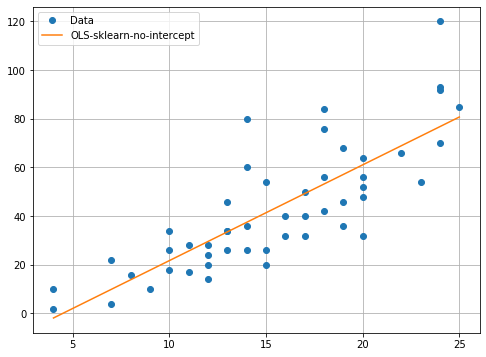

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import numpy as np
# Load data
url = 'https://forge.scilab.org/index.php/p/rdataset/source/file/master/csv/datasets/cars.csv'
dat = pd.read_csv(url)
y = dat['dist']
X = dat[['speed']] # sklearn needs X to have 2 dim.
skl_linmod = lm.LinearRegression(fit_intercept=True)
skl_linmod.fit(X, y) # Fit regression model

fig = plt.figure(figsize=(8, 6))
plt.plot(X, y, 'o', label="Data")
plt.plot(X, skl_linmod.predict(X), label="OLS-sklearn-no-intercept")
plt.legend(loc='upper left');
plt.grid()

## Reg 1D

Explication probabiliste : 
- on choisit x non aléatoire
- Y, $\epsilon$ aléatoires

Notations:
- $\theta_i^*$ est la vraie valeure, $\hat{\theta_i}$ est l'estimateur


- Utilisation de L2 à la place de L1 pour la dérivabilité
- Mais ce n'est pas une projection ortho

Gradiant :
- 1ere approx : vecteur des dérivées partielles
- $\frac{\partial u^2}{\partial u} = u u'$

### Exo 

f est-elle convexe ? Aide : la somme de fonctions convexe est convexe

Convexité:

\begin{align}
g(\alpha \theta_1 + (1- \alpha) \theta_2) \le \alpha g(\theta_1 + (1-\alpha)g(\theta_2), \alpha \in ]0, 1[
\end{align}

Autre solution : Matrice Hessienne positive

\begin{align}
\frac{\partial^2 f}{\partial x_1, x_2}
\end{align}

Symmétrique car les dérivées partielles sont commutatives.

Rappel : si M est symétrique $\in \mathbb{R}^{p \times p}$

$M$ est positive si : $ \forall x \in \mathbb{R}^{p}, x^TMx \ge 0$

Définie positive si $ \gt 0$

Si M est diagonalisable, M est positive $\iff$ v.p. positives

Preuve : 

\begin{align}
M &= U^{-1} D U \\
x^T M x &= x^T U^{-1} D U x = y^T D y = \sum_i y_i^2 \lambda_i \\
\end{align}

Preuve de la résolution du système linéaire à 2 variables:

\begin{align}
&\begin{cases}
\theta_0 (-n) + \theta_1 (-\sum_i x_i) = \sum_i y_i \\
\theta_0 (-\sum_i x_i) + \theta_1 (-\sum_i x_i^2) = \sum_i y_i x_i \\ 
\end{cases}
\\
&\begin{cases}
\theta_0 + \theta_1 (\overline{x_n}) = \overline{y_n}  & E1\\
\theta_0 (\overline{x_n}) + \theta_1 (\overline{x_n^2}) = \overline{y_n x_n}& E2 \\ 
\end{cases}
\\
& E2 - E1 \overline{x_n} : \theta_1(\overline{x_n^2} - \overline{x_n}^2) = \overline{x_n y_n} - \overline{x_n} . \overline{y_n}
\end{align}


Exo : 
\begin{align}
\forall x, y \in \mathbb{R}^n & \frac 1n \sum y_i x_i - \frac 1n \sum y_i -\frac 1n \sum x_i \\
   & = \frac 1n \sum (x_i - \overline{x_n})(y_i - \overline{y_n}) \\
   & = Cov_n(x, y)
\end{align}

Exo : si tous les x constants : toutes les droites qui passent par la moyenne sur y des valeurs est solution

Le barycentre des données est sur la droite de régression => motivation pour recentrer les valeurs

$\theta_1$ est la moyenne pondérée des pentes par la valeur des $x_i^2$ => effet levier.

Le recentrage et mise à l'échelle est important dans le cas des calculs numériques (inversion de matrice)

In [15]:
from sklearn import preprocessing
import math
scaler = preprocessing.StandardScaler().fit(X)
print(np.isclose(scaler.mean_, np.mean(X)))
print(np.array_equal(math.sqrt(scaler.var_), np.std(X)))
print(np.array_equal(scaler.transform(X),
                   (X - np.mean(X)) / np.std(X)))
print(np.array_equal(scaler.transform([[26]]),
                   (26 - np.mean(X)) / np.std(X)))

[ True]
False
True
False


## Résidus

Si $\epsilon$ Gaussien, les résidus suivent une loi Khi2

## (arg) Max de vraissemblance

- Densité gaussienne
- Produit de n variables de densité Gaussienne (indépendance) $f(x_1, ..., x_n) = \prod_i f(x_i, \theta)$

Fonction de vraissemblance

Le produit des $x_i$ reste Gaussien, la variance diminue avec n

### Exo 

Gaussien -> moindre carrés

$f(y_1,..., y_n) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{\frac{\sum_i \left(y_i - \theta_0 - \theta_1 x_i \right)^2}{2 \sigma ^ 2}}$

$ \underset{\theta}{argmax} f = argmin \left(\sum_i(y_i - \theta_0 - \theta_1 x_i)^2 \right)$

## Utilisation de puissances de X

Permet de réaliser le MCO sur des fonctions polynomiales.
Voir Slides.



# Régression multi dim

02_24LeastSquareDeffranne.pdf

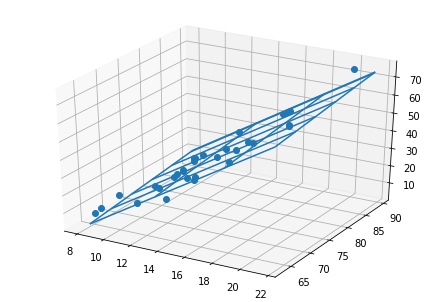

In [22]:
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm

# Load data
url = 'http://vincentarelbundock.github.io/Rdatasets/csv/datasets/trees.csv'
dat3 = pd.read_csv(url)
# Fit regression model
X = dat3[['Girth', 'Height']]
X = sm.add_constant(X)
y = dat3['Volume']
results = sm.OLS(y, X).fit().params
XX = np.arange(8, 22, 0.5)
YY = np.arange(64, 90, 0.5)
xx, yy = np.meshgrid(XX, YY)
zz = results[0] + results[1]*xx + results[2]*yy
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(X['Girth'],X['Height'],y,'o')
ax.plot_wireframe(xx, yy, zz, rstride=10, cstride=10);

## Formalisation reg multi-D

Rappel pour le slide 11 : 

$ \forall A \in \mathbb{R}^{n x p}, x, y \in \mathbb{R}^{p} \langle Ax, y \rangle = \langle x, A^T y \rangle$

Preuve : 

$ \langle Ax, y \rangle = y^T (Ax) = \langle (y^T A)^T, x \rangle $

## Gradient

$ h^T X^T X \theta = \langle xh, x \theta \rangle = \theta^T X^T X h$ (produit scalaire commutatif)

## Moindres carrés - équation(s) normale(s)

Si $ A = X^T X$ est inversible, solution unique

Cependant délicat : 
- problème de conditionnement (différence entre les v.p.)

## Matrice de Gram

$X^T X$ est appelée matrice de corrélation, Si X est centré-réduit

Il y a unicité à $ \iff Ker(X^T X) = \{0\}$

### Exo 

Montrer que $Ker(X) = Ker(X^TX)$

#### Solution (Anne)

$ \forall u \in Ker(X) \iff \Vert Xu \Vert_2^2 = 0 \iff u^T X^T X u = 0$

a) $Ker(X) \subset Ker(X^TX)$ car $ Xu = 0, X^TXu = 0$

b) $Ker(X^TX) \subset Ker(X)$ car $u^T X^T X u = \Vert Xu \Vert_2^2 = 0$

## Estimateur de moindre carré et unicité

Si $X \in \mathbb{R}^{n \times p}$
- Si p > n, le théorème du rang nous dit que Ker(X) non vide

$$
f : E -> f \\
\\
dim(E) = dim(Im f) + dim(Ker f)\\
\\
dim(Im f) = rang(f)\\
\\
rang(f) <= n\\
\\
dim(Ker f) = n - p\\
$$

### Exo

Montrer que $Ker(A) = \{0\}$ est équivalent au fait que la matrice $A^⊤A$ est inversible.

#### Solution

Comme 
- $Ker(A^TA) = Ker(A) = \{0\}$
- et $A \in \mathbb{R}^{m \times m} \iff Ker(A) = \{0\} \iff rang(A) = m$ 

CQFD

### Exo

Soit $P = \begin{pmatrix} 
\frac 1n & ... &\frac 1n \\
&... & \\
\frac 1n & ... & \frac 1n \end{pmatrix} \in \mathbb{R}^{n \times n}$

1. Vérifier que P est une matrice de projection orthogonale.
2. Déterminer Im(P), l’espace image de P.
3. On note $x = (x1,...,xn)^T$ et $\overline{x_n}$ la moyenne et $σ_x$ l’écart-type (empiriques) :

$$\overline{x_n} = \frac 1n \sum_{i=1}^n x_i$$

$$\sigma_x = \sqrt{\frac 1n \sum_{i=1}^n (x_i - \overline{x_n})^2}$$

Montrer que : $\sigma_x =  \frac{1}{\sqrt{n}} \Vert ({Id}_n - P)x \Vert$

#### Solution

1. vérifier que P est une matrice de projection orthogonale

$P^T = P$

$\forall i, j   (P^2)_{i,j} = \sum_{i=1}^n \frac{1}{n^2} = \frac 1n$

CQFD

2. Déterminer Im(P), l’espace image de P

Les colonnes de P sont toutes identiques et donc liées.

P étant linéaire

$Im(P) = \mathbb{R}$

3.

$\overline{x_n} = (\frac 1n \mathbb{1}_n) x$

$ Px = \begin{pmatrix} 
\overline{x_n}\\
\vdots \\
\overline{x_n}\end{pmatrix}$


$ ({Id}_n - P)x = \begin{pmatrix} 
\overline{x_n} x_1\\
\vdots \\
\overline{x_n} x_n \end{pmatrix}$



